In [ ]:
import pandas as pd
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import pipeline

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
df = pd.read_csv(url, sep=',', header= None)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
# Actualizamos el encabezado para las columnas
attributes = {0 : 'symboling', 1 : 'normalized-losses', 2 : 'make', 3:'fuel-type', 4 : 'aspiration',
              5 : 'num-of-doors',
              6 : 'body-style', 7 : 'drive-wheels', 8 : 'engine-location', 9 : 'wheel-base',
              10 : 'length', 11 : 'width', 12 : 'height', 13 : 'curb-weight', 14 : 'engine-type',
              15: 'num-of-cylinders', 16: 'engine-size', 17: 'fuel-system', 18: 'bore', 19: 'stroke',
              20: 'compression-ratio', 21: 'horsepower', 22: 'peak-rpm', 23: 'city-mpg',
              24: 'highway-mpg',
              25: 'price' }

df.rename(columns = attributes, inplace=True)


1. Title: 1985 Auto Imports Database

4. Relevant Information:
   -- Description
      This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars.  The second rating corresponds to the
      degree to which the auto is more risky than its price indicates.
      Cars are initially assigned a risk factor symbol associated with its
      price.   Then, if it is more risky (or less), this symbol is
      adjusted by moving it up (or down) the scale.  Actuarians call this
      process "symboling".  A value of +3 indicates that the auto is
      risky, -3 that it is probably pretty safe.

      The third factor is the relative average loss payment per insured
      vehicle year.  This value is normalized for all autos within a
      particular size classification (two-door small, station wagons,
      sports/speciality, etc...), and represents the average loss per car
      per year.

   -- Note: Several of the attributes in the database could be used as a
            "class" attribute.

5. Number of Instances: 205

6. Number of Attributes: 26 total
   -- 15 continuous
   -- 1 integer
   -- 10 nominal

7. Attribute Information:     
     Attribute:                Attribute Range:
     ------------------        -----------------------------------------------
  1. symboling:                -3, -2, -1, 0, 1, 2, 3.
  2. normalized-losses:        continuous from 65 to 256.
  3. make:                     alfa-romero, audi, bmw, chevrolet, dodge, honda,
                               isuzu, jaguar, mazda mercedes-benz, mercury,
                               mitsubishi, nissan, peugot, plymouth, porsche,
                               renault, saab, subaru, toyota, volkswagen, volvo
  4. fuel-type:                diesel, gas.
  5. aspiration:               std, turbo.
  6. num-of-doors:             four, two.
  7. body-style:               hardtop, wagon, sedan, hatchback, convertible.
  8. drive-wheels:             4wd, fwd, rwd.
  9. engine-location:          front, rear.
 10. wheel-base:               continuous from 86.6 120.9.
 11. length:                   continuous from 141.1 to 208.1.
 12. width:                    continuous from 60.3 to 72.3.
 13. height:                   continuous from 47.8 to 59.8.
 14. curb-weight:              continuous from 1488 to 4066.
 15. engine-type:              dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
 16. num-of-cylinders:         eight, five, four, six, three, twelve, two.
 17. engine-size:              continuous from 61 to 326.
 18. fuel-system:              1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
 19. bore:                     continuous from 2.54 to 3.94.
 20. stroke:                   continuous from 2.07 to 4.17.
 21. compression-ratio:        continuous from 7 to 23.
 22. horsepower:               continuous from 48 to 288.
 23. peak-rpm:                 continuous from 4150 to 6600.
 24. city-mpg:                 continuous from 13 to 49.
 25. highway-mpg:              continuous from 16 to 54.
 26. price:                    continuous from 5118 to 45400.

8. Missing Attribute Values: (denoted by "?")
   Attribute #:   Number of instances missing a value:
   2.             41
   6.             2
   19.            4
   20.            4
   22.            2
   23.            2
   26.            4





# Data cleaning

In [ ]:
values  = df[df['normalized-losses'] != '?']['normalized-losses'].astype(int).mean()

# replace ? with nan values
df['normalized-losses'] = df['normalized-losses'].replace(['?'], [np.nan])
df = df.fillna(value = values)
df['normalized-losses'] = df['normalized-losses'].astype(int)

df = df.replace(['?'], [np.nan])
df = df.fillna(method='ffill')
df['num-of-doors'] = df['num-of-doors'].replace({'two': 2, 'four': 4})
df['num-of-cylinders'] = df['num-of-cylinders'].replace({'eight': 8, 'five': 5, 'four': 4, 'six': 6, 'three': 3, 'twelve': 12, 'two':2 })
df['engine-size'] = df['engine-size'].astype(int)
df['bore'] = df['bore'].astype(float)
df['stroke'] = df['stroke'].astype(float)
df['compression-ratio'] = df['compression-ratio'].astype(int)
df['horsepower'] = df['horsepower'].astype(int)
df['peak-rpm'] = df['peak-rpm'].astype(int)
df['city-mpg'] = df['city-mpg'].astype(int)
df['highway-mpg'] = df['highway-mpg'].astype(int)
df['price'] = df['price'].astype(int)

In [ ]:
# Encoding Categorical Data
cols = df.select_dtypes(['object']).columns
cols

Index(['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels',
       'engine-location', 'engine-type', 'fuel-system'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder( dtype = int)
df[cols] = oe.fit_transform(df[cols])
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,0,1,0,2,0,2,0,88.6,...,130,5,3.47,2.68,9,111,5000,21,27,13495
1,3,122,0,1,0,2,0,2,0,88.6,...,130,5,3.47,2.68,9,111,5000,21,27,16500
2,1,122,0,1,0,2,2,2,0,94.5,...,152,5,2.68,3.47,9,154,5000,19,26,16500
3,2,164,1,1,0,4,3,1,0,99.8,...,109,5,3.19,3.40,10,102,5500,24,30,13950
4,2,164,1,1,0,4,3,0,0,99.4,...,136,5,3.19,3.40,8,115,5500,18,22,17450


In [ ]:
#df.drop(['make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system'], axis=1, inplace=True)

X = df.loc[:, df.columns != 'price']
Y = df['price']

# using the train test split function
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size = 0.2,
                                                    random_state = 0,
                                                    train_size = 0.8,
                                                    shuffle = True)

<Axes: >

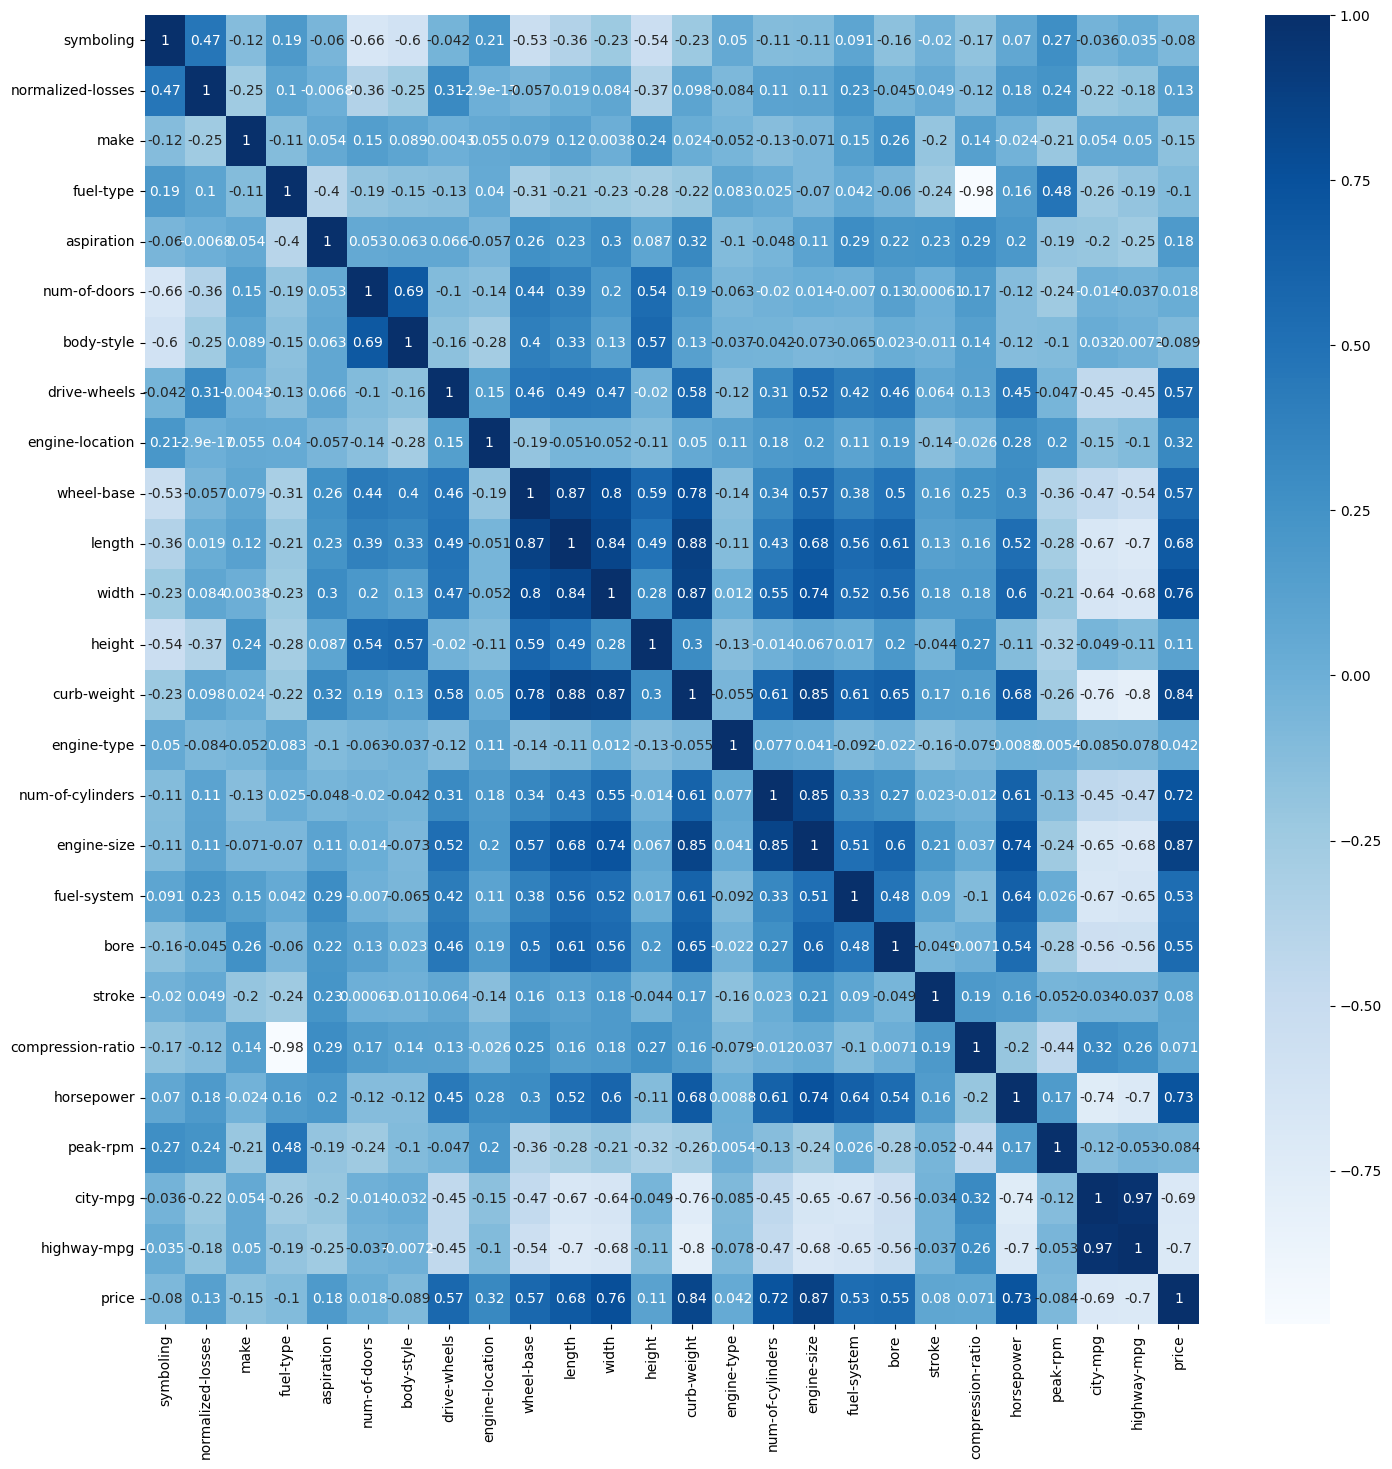

In [ ]:
plt.figure(figsize=(17, 17))
sns.heatmap(df.corr(), cbar=True, annot=True, cmap='Blues')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    int64  
 2   make               205 non-null    int64  
 3   fuel-type          205 non-null    int64  
 4   aspiration         205 non-null    int64  
 5   num-of-doors       205 non-null    int64  
 6   body-style         205 non-null    int64  
 7   drive-wheels       205 non-null    int64  
 8   engine-location    205 non-null    int64  
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    int64  
 15  num-of-cylinders   205 non-null    int64  
 16  engine-size        205 non

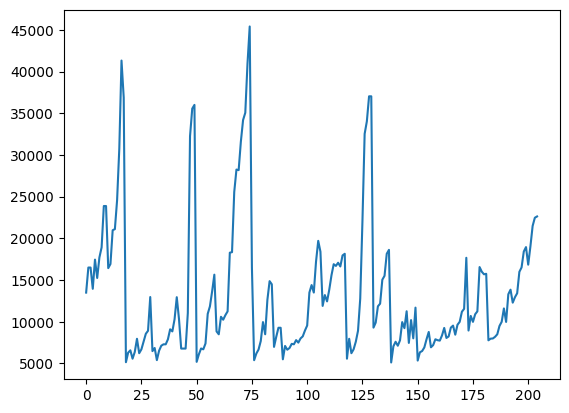

In [ ]:
plt.plot(df['price'])

# Mínimos cuadrados con expansión polinomial de diferentes grados.

In [ ]:
#scaling the data
scaler = StandardScaler()
scaler.fit(X_train)
#X_train = scaler.transform(X_train)

degrees = 15
k = 5

mean_squared_errors_train = np.zeros((degrees+1, 10*k))
mean_squared_errors_test  = np.zeros((degrees+1, 10*k))

for degree in range(1, degrees+1):
  X_train_degree = np.hstack( [scaler.transform(X_train)**(i-1) for i in range(degree)] )
  model = LinearRegression( )

  k_fold = RepeatedKFold(n_splits = k, random_state = 0)

  scores = cross_validate(model,
                          X_train_degree, Y_train,
                          scoring= 'neg_mean_squared_error',
                          cv = k_fold,
                          return_train_score = True)

  mean_squared_errors_train[degree][:] = 1- scores['train_score']
  mean_squared_errors_test[degree][:]  = 1- scores['test_score']


In [ ]:
# arrays into data frame
mean_squared_errors_train = pd.DataFrame((mean_squared_errors_train).transpose())
mean_squared_errors_test = pd.DataFrame((mean_squared_errors_test).transpose())

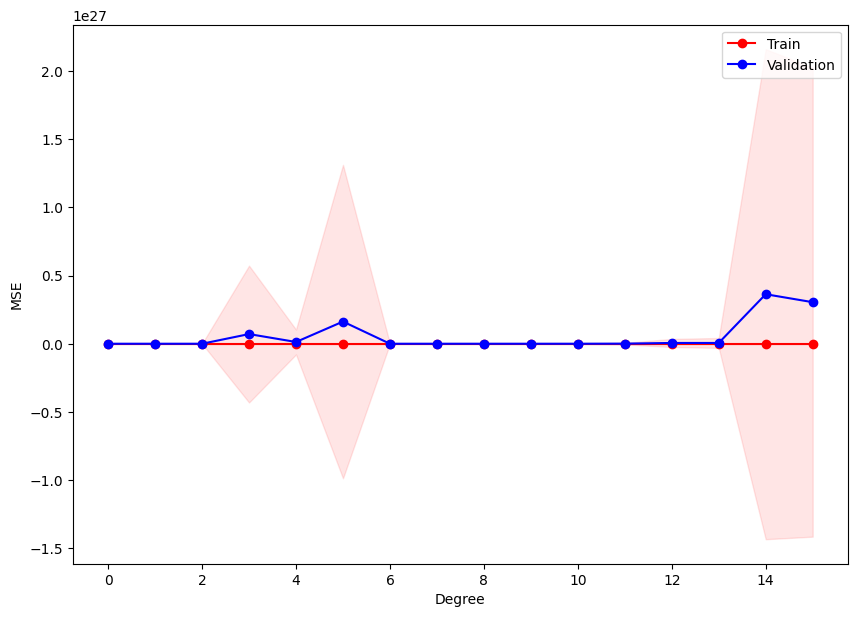

In [ ]:
deg = list(range(degrees))

def plot_with_std(mean_squared_errors_train, mean_squared_errors_test, atributo):
  plt.figure(figsize=(10, 7))

  deg = list(range(len(mean_squared_errors_train.mean())))

  plt.fill_between(deg, mean_squared_errors_train.mean() - mean_squared_errors_train.std() , mean_squared_errors_train.mean() + mean_squared_errors_train.std(), alpha=0.1, color='r')
  plt.fill_between(deg, mean_squared_errors_test.mean() - mean_squared_errors_test.std() , mean_squared_errors_test.mean() + mean_squared_errors_test.std(), alpha=0.1, color='r')

  plt.plot(deg, mean_squared_errors_train.mean(), 'o-', color="r", label="Train")
  plt.plot(deg, mean_squared_errors_test.mean(), 'o-', color='b', label="Validation")


  plt.xlabel(atributo)
  plt.ylabel('MSE')
  plt.legend()
  plt.show()

plot_with_std(mean_squared_errors_train, mean_squared_errors_test, 'Degree')

In [ ]:
resultados = pd.DataFrame({'train' : mean_squared_errors_train.mean().to_list(),
             'test' : mean_squared_errors_test.mean().to_list(),
             'grado' : range(0, degrees+1)})

In [ ]:
resultados.sort_values(by ='test')

,train,test,grado
0,0.000000e+00,0.000000e+00,0
2,1.077660e+07,4.492862e+07,2
1,1.077660e+07,4.492862e+07,1
6,3.138323e+05,2.211171e+10,6
7,1.036289e+05,2.794469e+14,7
8,6.690133e+04,1.627962e+17,8
9,6.406116e+04,2.889771e+20,9
10,6.011289e+04,6.980814e+22,10
11,5.726094e+04,7.942506e+23,11
12,5.445960e+04,5.784143e+24,12


Podemos observar que los mejores mejores resultados se producen usando grados 2, 1, 6. En los grados de 3 a 5 la desviación estandar es muy grande para el conjunto de prueba, luego vuelve a bajar el error y a disminuir la desviación estandar. Después del grado 13 vuelve a subir mucho la desviación estandar

#b. Mínimos cuadrados con expansión polinomial de grado 20 y penalización por norma $l_1$ y $l_2$ con diferentes valores de λ.



##Regularización Lasso

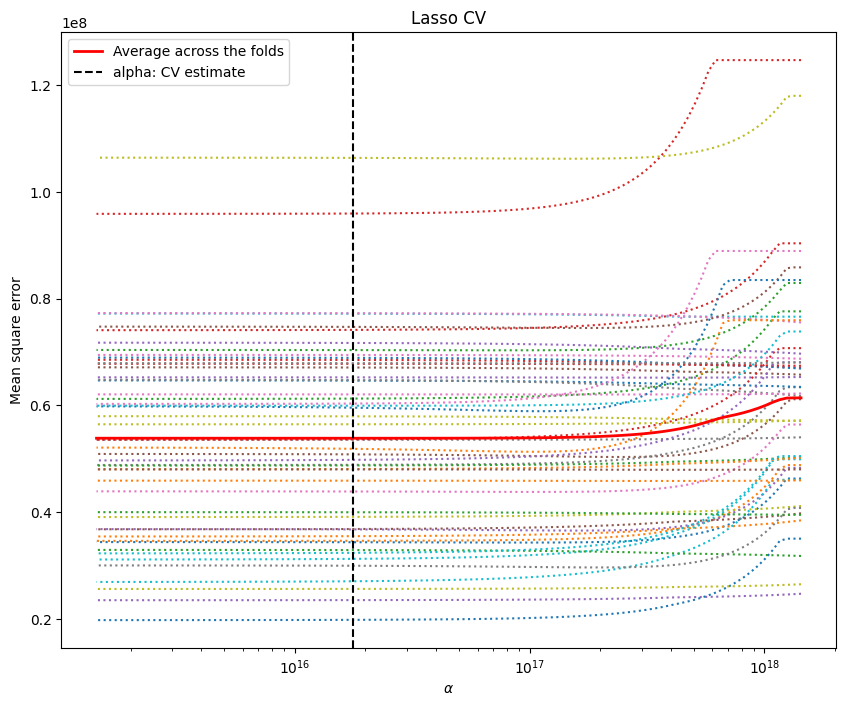

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso

degree = 20
k = 5

#data frame to store scores across the folds
df_lasso = pd.DataFrame(columns= np.arange(100))
df_lasso2 = pd.DataFrame(columns= np.arange(100))

alfas = []
mse = []

#set up k fold
k_fold = RepeatedKFold(n_splits = k, random_state = 0)


X_train_degree = np.hstack( [scaler.transform(X_train)**(i-1) for i in range(degree)] )

model = LassoCV(cv = k_fold, random_state=0).fit(X_train_degree, Y_train)

lasso = model
alfas.append(lasso.alpha_)

# mse in test set
df_lasso = pd.concat( [pd.DataFrame(lasso.mse_path_.transpose()), df_lasso] )

mse.append(lasso.mse_path_.mean(axis=-1).min())

#to get train scores
for alp in range(len(lasso.alphas_)):
  model2 =  Lasso(alpha = lasso.alphas_[alp])
  scores = cross_validate(model2,
                          X_train_degree,
                          Y_train,
                          scoring= 'neg_mean_squared_error',
                          cv = k_fold,
                          return_train_score = True)

  df_lasso2[alp ] = 1- scores['train_score']



# ----------- plot -------------------------
plt.figure(figsize=(10, 8))
ymin, ymax = 2300, 3800

plt.semilogx(lasso.alphas_, lasso.mse_path_, linestyle=":")
plt.plot(
    lasso.alphas_,
    lasso.mse_path_.mean(axis=-1),
    color="red",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lasso.alpha_, linestyle="--", color="black", label="alpha: CV estimate")

#plt.ylim(ymin, ymax)

plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.title("Lasso CV")
plt.legend()

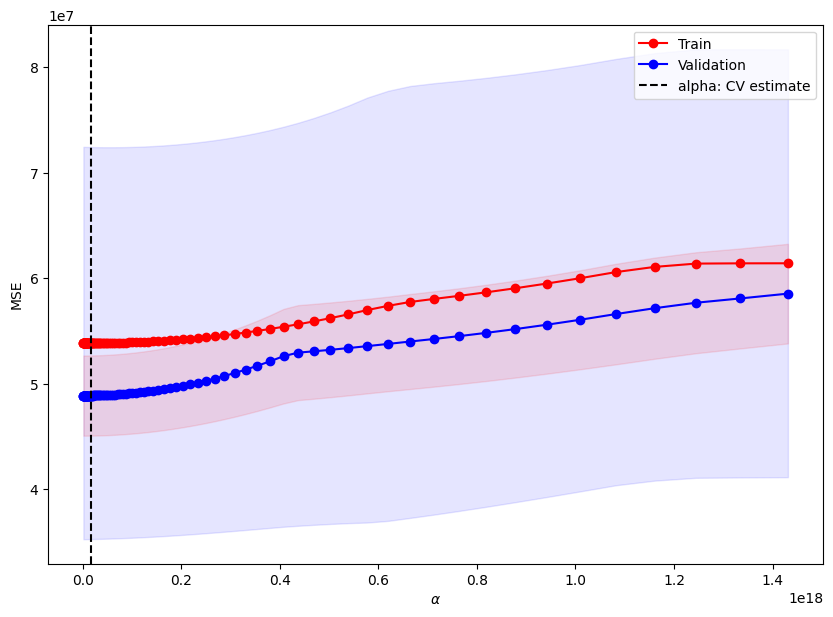

In [ ]:
deg = list(range(100))
plt.figure(figsize=(10, 7))

plt.fill_between(lasso.alphas_, df_lasso.mean() - df_lasso.std() , df_lasso.mean() + df_lasso.std(), alpha=0.1, color='b')
plt.fill_between(lasso.alphas_, df_lasso2.mean() - df_lasso2.std() , df_lasso2.mean() + df_lasso2.std(), alpha=0.1, color='r')

#plt.fill_between(deg, mean_squared_errors_test.mean() - mean_squared_errors_test.std() , mean_squared_errors_test.mean() + mean_squared_errors_test.std(), alpha=0.1, color='r')

plt.plot(lasso.alphas_, df_lasso.mean(), 'o-', color="r", label="Train")
plt.plot(lasso.alphas_, df_lasso2.mean(), 'o-', color='b', label="Validation")
plt.axvline(lasso.alpha_, linestyle="--", color="black", label="alpha: CV estimate")

plt.xlabel(r"$\alpha$")
plt.ylabel('MSE')
plt.legend()
#plt.xlim([0,3])
plt.show()

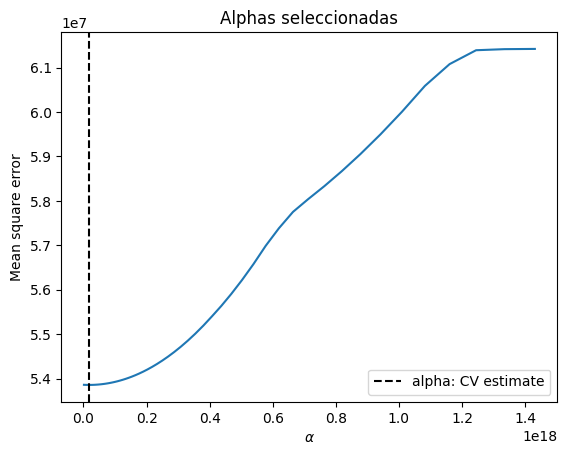

In [ ]:
plt.plot(lasso.alphas_, lasso.mse_path_.mean(axis=1))
plt.axvline(lasso.alpha_, linestyle="--", color="black", label="alpha: CV estimate")
plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.title("Alphas seleccionadas")
plt.legend()

In [ ]:
# summarize result
print('Best Score: %s' % lasso.score(X_train_degree, Y_train))
print('Best Hyperparameters: %s' % lasso.alpha_)

Best Score: 0.1917159009784376
Best Hyperparameters: 1.7643629594268826e+16


Podemos observar que la desviación estandar durante las folds es demasiado grande para todas las alphas, aunque se encontró un alpha con un buen mse. Lo cual puede indicar que usar un polinomio de grado 20 no es lo más adecuado para este prpblema

##Regularización Ridge

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=1.04645e-16): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=1.09065e-16): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=9.77688e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=1.08953e-16): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:253: LinAl

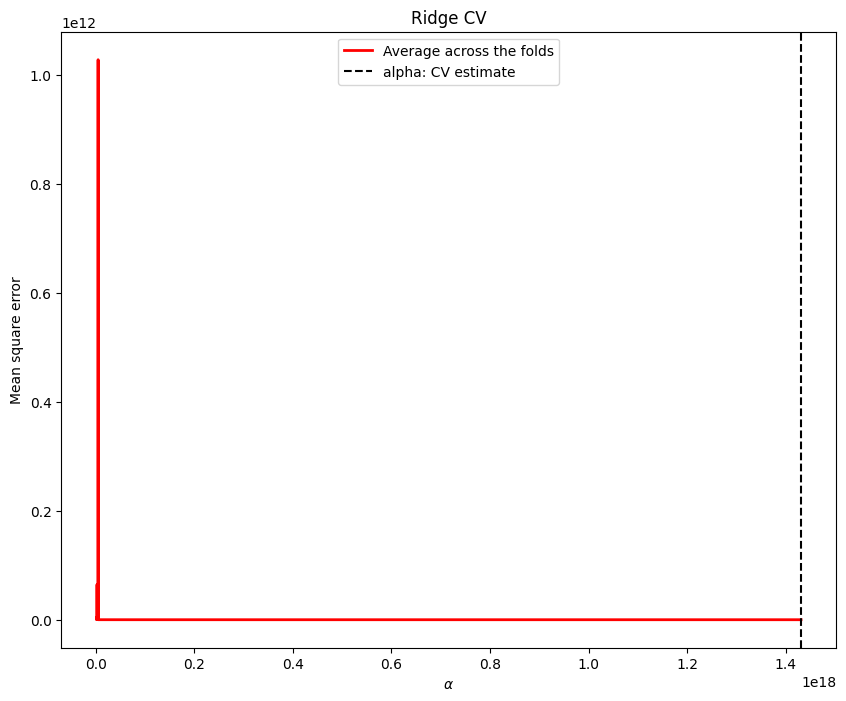

In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge

k = 5

df_ridge = pd.DataFrame(columns= np.arange(100))
df_ridge2 = pd.DataFrame(columns= np.arange(100))

mse = []

k_fold = RepeatedKFold(n_splits = k, random_state = 0)

model = RidgeCV(alphas = lasso.alphas_, store_cv_values = True).fit(X_train_degree, Y_train)

ridge = model

df_ridge = pd.concat( [pd.DataFrame(ridge.cv_values_.transpose()), df_ridge] )

mse.append(ridge.cv_values_.mean(axis=-1).min())

#to get train scores
for alp in range(len(lasso.alphas_)):
  model2 =  Ridge(alpha = lasso.alphas_[alp])
  scores = cross_validate(model2,
                          X_train_degree,
                          Y_train,
                          #scoring= 'neg_mean_squared_error',
                          cv = k_fold,
                          return_train_score = True)

  df_ridge2[alp ] = 1- scores['train_score']



# ----------- plot -------------------------
plt.figure(figsize=(10, 8))
ymin, ymax = 2300, 3800

#plt.semilogx(lasso.alphas_, ridge.cv_values_, linestyle=":")
plt.plot(
    lasso.alphas_,
    ridge.cv_values_.mean(axis=0),
    color="red",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(ridge.alpha_, linestyle="--", color="black", label="alpha: CV estimate")

#plt.ylim(ymin, ymax)

plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.title("Ridge CV")
plt.legend()

# c. Mínimos cuadrados con expansión polinomial de grado 2 y selección de atributos

##Recursive Feature Elimination

The Recursive Feature Elimination (RFE) method is a feature selection approach. It works by recursively removing attributes and building a model on those attributes that remain. It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

In [ ]:
degree = 2

# creating a KFold object with 5 splits
folds = RepeatedKFold(n_splits = 5, random_state = 0)

# specify range of hyperparameters
hyper_params = [{'n_features_to_select': list(range(2, X.shape[1]))}]

# scaling the data
scaler.fit(X_train)
X_train_degree = np.hstack( [scaler.transform(X_train)**(i) for i in range(degree+1)] )

# specify model
model = LinearRegression( )
rfe = RFE(model)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = rfe,
                        param_grid = hyper_params,
                        scoring= 'neg_mean_squared_error',
                        cv = folds,
                        #verbose = 1,
                        return_train_score = True,
                        error_score='raise')

# fit the model
model_cv.fit(X_train_degree, Y_train)


GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=5, random_state=0),
             error_score='raise', estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                   11, 12, 13, 14, 15, 16, 17,
                                                   18, 19, 20, 21, 22, 23,
                                                   24]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)

In [ ]:
plt.plot(cv_results["param_n_features_to_select"], 1- cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], 1- cv_results["mean_train_score"])
plt.axvline(list(model_cv.best_params_.values())[0], linestyle="--", color="black", label="n_features_to_select: CV estimate")
plt.xlabel('number of features')
plt.ylabel('mean_squared_error')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score', "n_features_to_select: CV estimate"], loc='upper right')


NameError: ignored

In [ ]:
# summarize result
print('Best Score: ',  1-model_cv.best_score_)
print('Best Hyperparameters: %s' % model_cv.best_params_)


Best Score:  15788287.66717945
Best Hyperparameters: {'n_features_to_select': 6}


In [ ]:
# final model
n_features_optimal = list(model_cv.best_params_.values())[0]

lm = LinearRegression()
lm.fit(X_train_degree, Y_train)

rfe = RFE(lm, n_features_to_select = n_features_optimal)
rfe = rfe.fit(X_train_degree, Y_train)

# predict prices of X_test

# scaling the data test
scaler.fit(X_test)
X_test_degree = np.hstack( [scaler.transform(X_test)**(i) for i in range(degree+1)] )

Y_pred = lm.predict(X_test_degree)
mse = mean_squared_error(Y_test, Y_pred)
print(mse)


NameError: ignored

In [ ]:
Y_pred.size

41